In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import random

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
with open('unique_cards_cleaned', 'rb') as f: # 100% Of features
    unique_cards_cleaned = pickle.load(f)
    
with open('unique_top_50', 'rb') as f: # Top 50% of features
    unique_top_50 = pickle.load(f)

In [5]:
def quick_test(model, X, y):
# The following splits result in: 60% Train, 20% Val, 20% Test
    xtrain_val, xtest, ytrain_val, ytest = train_test_split(X, y, test_size=0.2)
    xtrain, xval, ytrain, yval = train_test_split(xtrain_val, ytrain_val, test_size=0.25)   
# val
    model_60 = model.fit(xtrain, ytrain)
    val_score = np.round(model_60.score(xval, yval), 3)
# train
    train_score = np.round(model_60.score(xtrain, ytrain), 3)
# overfit        
    overfit_score = np.round(abs(val_score-train_score), 4)
# test   
    model_80 = model.fit(xtrain_val, ytrain_val)
    test_score = np.round(model_80.score(xtest, ytest), 3)
# F1
    y_true = ytest
    y_pred = model_80.predict(xtest)
# ROC AUC
    y_score = model_80.predict_proba(xtest)
    
    return [val_score, train_score, overfit_score, test_score, y_true, y_pred, y_score, model_80]

In [6]:
def quick_predict(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.predict(xtest), ytest

def quick_probas(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.predict_proba(xtest), ytest

In [7]:
X_100 = unique_cards_cleaned.drop('Binary_Rank', axis = 1)
y_100 = unique_cards_cleaned.loc[:, 'Binary_Rank']

In [8]:
X_50 = unique_top_50.drop('Binary_Rank', axis = 1)
y_50 = unique_top_50.loc[:, 'Binary_Rank']

In [9]:
#xtrain_100, xtest_100, ytrain_100, ytest_100 = train_test_split(X_100, y_100, test_size=0.3)

In [10]:
#xtrain_50, xtest_50, ytrain_50, ytest_50 = train_test_split(X_50, y_50, test_size=0.3)

In [11]:
# Logistic Regression
logreg_C_one = LogisticRegression(C = 1)
logreg_C_ten = LogisticRegression(C = 10)

In [13]:
# F1 Score
# 100% Features, C = 1:
test_results100_LR_C_one = quick_test(logreg_C_one, X_100, y_100)
y_true = test_results100_LR_C_one[4]
y_pred = test_results100_LR_C_one[5]
F1_C_one = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results100_LR_C_one[6][:,1]
ROC_AUC_C_one = np.round(roc_auc_score(y_true, y_score), 3)

In [14]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results100_LR_C_one[4],
                                                       probas_pred = test_results100_LR_C_one[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results100_LR_C_one[4], y_score = test_results100_LR_C_one[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results100_LR_C_one[4], test_results100_LR_C_one[6][:,1]), 3)

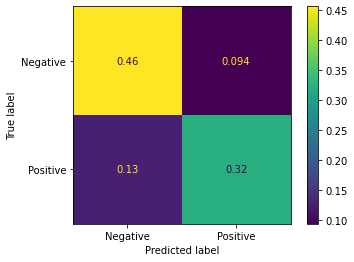

In [15]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, title_text=f'Logistic Regression Model (100% Features, C = 1)')
fig.show()

cm = confusion_matrix(y_true = test_results100_LR_C_one[4], y_pred = test_results100_LR_C_one[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [16]:
# 50% Features, C = 10:
test_results50_LR_C_ten = quick_test(logreg_C_ten, X_50, y_50)
y_true = test_results50_LR_C_ten[4]
y_pred = test_results50_LR_C_ten[5]
F1_C_ten = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results50_LR_C_ten[6][:,1]
ROC_AUC_C_ten = np.round(roc_auc_score(y_true, y_score), 3)

In [17]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results50_LR_C_ten[4],
                                                       probas_pred = test_results50_LR_C_ten[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results50_LR_C_ten[4], y_score = test_results50_LR_C_ten[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results50_LR_C_ten[4], test_results50_LR_C_ten[6][:,1]), 3)

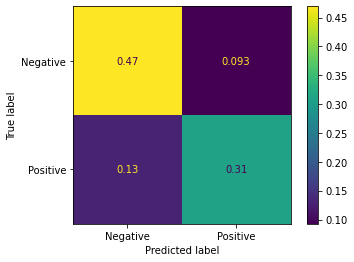

In [18]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, title_text=f'Logistic Regression Model (50% Features, C = 10)')
fig.show()

cm = confusion_matrix(y_true = test_results50_LR_C_ten[4], y_pred = test_results50_LR_C_ten[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [19]:
# Decision Trees:
dt_depth_16 = DecisionTreeClassifier(max_depth=16)

In [20]:
# F1 & ROC Score
# 100% Features, Max Depth = 16:
test_results100_dt_16 = quick_test(dt_depth_16, X_100, y_100)
y_true = test_results100_dt_16[4]
y_pred = test_results100_dt_16[5]
F1_D_16 = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results100_dt_16[6][:,1]
ROC_AUC_D_16 = np.round(roc_auc_score(y_true, y_score), 3)

In [21]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results100_dt_16[4],
                                                       probas_pred = test_results100_dt_16[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results100_dt_16[4], y_score = test_results100_dt_16[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results100_dt_16[4], test_results100_dt_16[6][:,1]), 3)

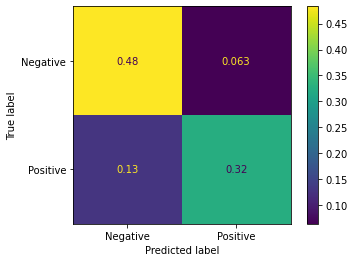

In [22]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, title_text=f'Decision Tree Model (100% Features, Depth = 16)')
fig.show()

cm = confusion_matrix(y_true = test_results100_dt_16[4], y_pred = test_results100_dt_16[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [23]:
# 50% Features, Max Depth = 16:
test_results50_dt_16 = quick_test(dt_depth_16, X_50, y_50)
y_true = test_results50_dt_16[4]
y_pred = test_results50_dt_16[5]
F1_D_16 = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results50_dt_16[6][:,1]
ROC_AUC_D_16 = np.round(roc_auc_score(y_true, y_score), 3)

In [24]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results50_dt_16[4],
                                                       probas_pred = test_results50_dt_16[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results50_dt_16[4], y_score = test_results50_dt_16[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results50_dt_16[4], test_results50_dt_16[6][:,1]), 3)

In [25]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, title_text=f'Decision Tree Model (50% Features, Depth = 16)')
fig.show()

cm = confusion_matrix(y_true = test_results50_dt_16[4], y_pred = test_results50_dt_16[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [26]:
# Random Forests
rf_n_100_depth_16 = RandomForestClassifier(n_estimators=100, max_depth=16)

In [27]:
# 100% Features, n = 10 Max Depth = 16:
test_results100_n_100 = quick_test(rf_n_100_depth_16, X_100, y_100)
y_true = test_results100_n_100[4]
y_pred = test_results100_n_100[5]
F1_N_100 = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results100_n_100[6][:,1]
ROC_AUC_N_100 = np.round(roc_auc_score(y_true, y_score), 3)

In [28]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results100_n_100[4],
                                                       probas_pred = test_results100_n_100[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results100_n_100[4], y_score = test_results100_n_100[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results100_n_100[4], test_results100_n_100[6][:,1]), 3)

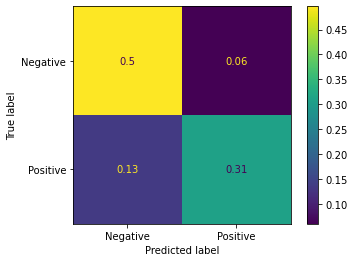

In [29]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, title_text=f'Random Forest Model (100% Features, Depth = 16, Estimators = 100)')
fig.show()

cm = confusion_matrix(y_true = test_results100_n_100[4], y_pred = test_results100_n_100[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [30]:
# 50% Features, n = 100 Max Depth = 16:
test_results50_n_100 = quick_test(rf_n_100_depth_16, X_50, y_50)
y_true = test_results50_n_100[4]
y_pred = test_results50_n_100[5]
F1_N_100 = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results50_n_100[6][:,1]
ROC_AUC_N_100 = np.round(roc_auc_score(y_true, y_score), 3)

In [31]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results50_n_100[4],
                                                       probas_pred = test_results50_n_100[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results50_n_100[4], y_score = test_results50_n_100[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results50_n_100[4], test_results50_n_100[6][:,1]), 3)

In [32]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, title_text=f'Random Forest Model (50% Features, Depth = 16, Estimators = 100)')
fig.show()

cm = confusion_matrix(y_true = test_results50_n_100[4], y_pred = test_results50_n_100[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [33]:
# Adaptive Boost
adaboost_16 = AdaBoostClassifier(base_estimator = dt_depth_16, n_estimators=10)

In [34]:
test_results100_ada10 = quick_test(adaboost_16, X_100, y_100)
y_true = test_results100_ada10[4]
y_pred = test_results100_ada10[5]
F1_ada100 = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results100_ada10[6][:,1]
ROC_AUC_ada100 = np.round(roc_auc_score(y_true, y_score), 3)

In [35]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results100_ada10[4],
                                                       probas_pred = test_results100_ada10[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results100_ada10[4], y_score = test_results100_ada10[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results100_ada10[4], test_results100_ada10[6][:,1]), 3)

In [36]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, 
                  title_text=f'Adaboosted Decision Tree Model (100% Features, Depth = 16, Estimators = 10)')
fig.show()

cm = confusion_matrix(y_true = test_results100_ada10[4], y_pred = test_results100_ada10[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [37]:
test_results50_ada10 = quick_test(adaboost_16, X_100, y_100)
y_true = test_results50_ada10[4]
y_pred = test_results50_ada10[5]
F1_ada50 = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results50_ada10[6][:,1]
ROC_AUC_ada50 = np.round(roc_auc_score(y_true, y_score), 3)

In [38]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results50_ada10[4],
                                                       probas_pred = test_results50_ada10[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results50_ada10[4], y_score = test_results50_ada10[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results50_ada10[4], test_results50_ada10[6][:,1]), 3)

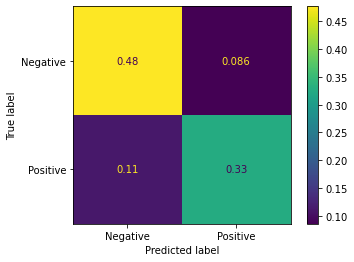

In [39]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, 
                  title_text=f'Adaboosted Decision Tree Model (50% Features, Depth = 16, Estimators = 10)')
fig.show()

cm = confusion_matrix(y_true = test_results50_ada10[4], y_pred = test_results50_ada10[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [40]:
# Gradient Boosting
gradboost_16 = GradientBoostingClassifier(n_estimators=100)

In [41]:
test_results100_gboost = quick_test(gradboost_16, X_100, y_100)
y_true = test_results100_gboost[4]
y_pred = test_results100_gboost[5]
F1_gboost = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results100_gboost[6][:,1]
ROC_AUC_gboost = np.round(roc_auc_score(y_true, y_score), 3)

In [42]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results100_gboost[4],
                                                       probas_pred = test_results100_gboost[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results100_gboost[4], y_score = test_results100_gboost[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results100_gboost[4], test_results100_gboost[6][:,1]), 3)

In [43]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, 
                  title_text=f'Gradient Boosted Model (100% Features, Estimators = 100)')
fig.show()

cm = confusion_matrix(y_true = test_results100_gboost[4], y_pred = test_results100_gboost[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [44]:
test_results50_gboost = quick_test(gradboost_16, X_50, y_50)
y_true = test_results50_gboost[4]
y_pred = test_results50_gboost[5]
F1_gboost = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results50_gboost[6][:,1]
ROC_AUC_gboost = np.round(roc_auc_score(y_true, y_score), 3)

In [45]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results50_gboost[4],
                                                       probas_pred = test_results50_gboost[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results50_gboost[4], y_score = test_results50_gboost[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results50_gboost[4], test_results50_gboost[6][:,1]), 3)

In [46]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, 
                  title_text=f'Gradient Boosted Model (50% Features, Estimators = 100)')
fig.show()

cm = confusion_matrix(y_true = test_results50_gboost[4], y_pred = test_results50_gboost[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()

In [47]:
# Best Ensemble 50% Features Stack
logReg = LogisticRegression(C = 10)
dTree = DecisionTreeClassifier(max_depth=16)
randForst = RandomForestClassifier(n_estimators=100, max_depth=16)
adaBoost = AdaBoostClassifier(base_estimator = dt_depth_16, n_estimators=10)
gradBoost = GradientBoostingClassifier(n_estimators=100)

diverse_model_list = [('logReg', logReg), ('dTree', dTree), ('randForst', randForst), ('adaBoost', adaBoost), 
                      ('gradBoost', gradBoost)]
best_50_stack = StackingClassifier(estimators = diverse_model_list, final_estimator = LogisticRegression())

In [48]:
test_results_best_50_stack = quick_test(best_50_stack, X_50, y_50)
y_true = test_results_best_50_stack[4]
y_pred = test_results_best_50_stack[5]
F1_C_tenth = np.round(f1_score(y_true, y_pred), 3)
y_score = test_results_best_50_stack[6][:,1]
ROC_AUC_C_tenth = np.round(roc_auc_score(y_true, y_score), 3)

In [49]:
precision, recall, thresholds = precision_recall_curve(y_true = test_results_best_50_stack[4],
                                                       probas_pred = test_results_best_50_stack[6][:,1])
PR_AUC = np.round(metrics.auc(recall, precision), 3)

fpr, tpr, thresholds = roc_curve(y_true = test_results_best_50_stack[4], y_score = test_results_best_50_stack[6][:,1])
ROC_AUC = np.round(roc_auc_score(test_results_best_50_stack[4], test_results_best_50_stack[6][:,1]), 3)

In [50]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Precision v. Recall AUC = {PR_AUC}',f'ROC AUC = {ROC_AUC}'))

fig.add_trace(
    go.Scatter(x=recall, y=precision),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=fpr, y=tpr),
    row=1, col=2)

fig.update_layout(height=500, width=900, 
                  title_text=f'Ensemble of All Models (50% Features, C = 10, Depth = 16, Estimators = 100)')
fig.show()

cm = confusion_matrix(y_true = test_results_best_50_stack[4], y_pred = test_results_best_50_stack[5], normalize='all')
cmd = ConfusionMatrixDisplay((cm), display_labels=['Negative','Positive'])
cmd.plot()